# <center> ArcGIS API for Python
<img src="arcgisapi.png" style="width=400px;">

## 1. Introduction

The primary objective of this assignment is using jupyter notebook to upload digitized features of Holman Field Airport to Arcgis Online and publish it as a hosted feature layer. The secondary objective is overlaying the feature layer on top of the basemap provided by Esri.

## 2. Workflow

Instead of using the example jupyter notebook, I created a new jupyter notebook from scratch. I tried to use my own word and commands to finish this task, so it looks different from the example jupyter notebook.

### 2.1. Import "GIS Object"
Import **"GIS" Object** from the **"gis" module** within the **Pythonic library package "arcgis"** maintained by Esri to perform GIS visualization and analysis, spatial data management, and GIS administration tasks.

In [1]:
from arcgis.gis import GIS  

- "gis" module provides information model for GIS hosted within ArcGIS Online and Portal for ArcGIS. It offers functionality to manage GIS users, groups and contents. It is the most important module and porvide the entry point into the GIS.

- "GIS" object provides helper objects to manage GIS resources and is the most important object when working with the ArcGIS API for Python. It represents the online GIS we are working with, eiter ArcGIS Online or Portal for ArcGIS.

### 2.2 Create "GIS Object"
Create a GIS object by passing in login credential. In this case, using the Pro licensing as login credential.

In [2]:
#Create a GIS Object
gis=GIS('Pro')
#gis is merely a variable, can be replaced by any other words
#Built-in login (through Pro licensing) to ArcGIS Online

- In this case, I used my Pro licensing to connect ArcGIS Online so I am able to see my personal, organizational and public GIS contents on ArcGIS Online. However, if I leave the parentheses blank, I will be only allowed to see public GIS contents on ArcGIS Online as I logged in anonymously.
- Here, I am allowed to manage the GIS (ArcGIS Online) content.

### 2.3 Add the resource to ArcGIS online content and publish it
Get prepared to add the GIS resource to ArcGIS online and publish it

- To manage the content of the GIS, we use the class called **"Content Manger"** to help us. The instance of this class is called **"content"** and we call the methods on this object to manipulate items.
- In this exercies, we have to upload a file Geodatabase to ArcGIS Online so we use the `add()` method to enable us to do that.

In [3]:
item_properties={'filetype':'Geodatabase', 'filename':'Link05.gdb'} 

- To upload the item, we must need to specify the argument **"item_properties"** in the first place which required to use dictionary.
- In this case, we only use keys **"type"** and **"filename"**.
- **"type"** indicates the type of the item. It is supposed to work with different types of item; however,it does not work with file Geodatabase. I tried using different descriptions on the key and only **"filetype"** worked.

In [4]:
item_properties #display the properties of the item

{'filetype': 'Geodatabase', 'filename': 'Link05.gdb'}

In [5]:
EX5=gis.content.add(item_properties, data='C:/Users/Q Ray Lin/Documents/ArcGIS/Projects/EX5/EX5/Link05.gdb.zip')
EX5 #Here, EX5 is regarded as an item added into the GIS content. 

<Item title:"Link05.gdb" type:File Geodatabase owner:lin00297_UMN>

- Given that the item we are going to uploade is a file, we must need to provde a path to it.

In [6]:
EX5.publish()

<Item title:"Link05.gdb" type:Feature Layer Collection owner:lin00297_UMN>

- The item  appears with the format of file Geodatabase in the Content page of ArcGIS Online. Hence, we need to tell ArcGIS Online to use it as a soruce to publish a hosted feature layer.

### 2.4 Retrieve the GIS resource
Search the item in the content of ArcGIS Online

In [7]:
layers=gis.content.search('Link05.gdb')
layers

[<Item title:"Link05.gdb" type:File Geodatabase owner:lin00297_UMN>,
 <Item title:"Link05.gdb" type:Feature Layer Collection owner:lin00297_UMN>]

- We need to know where is the layer before overlaying with a basemap.
- Given that there are too many layers in my Content,I search the name of feature layer directly.

In [8]:
from IPython.display import display
for items in layers:
    display(items) #Visually display all the feature layers in my content

<Item title:"Link05.gdb" type:File Geodatabase owner:lin00297_UMN>

<Item title:"Link05.gdb" type:Feature Layer Collection owner:lin00297_UMN>

### 2.5 Visualize the GIS resource
Create a basemap and add the layer on it

- The Object **"GIS"** includes a map widget for displaying geographic locations and visualizing GIS content. We call this widget using `gis.map()` and assign it to a variable.

In [9]:
#Create a map widget
map1=gis.map(location='St Paul, MN',zoomlevel=14) #assing map1 as the variable and provide location and zoomlevel information
map1

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oc…

In [10]:
map1.center=[44.933,-93.06] #move the map center to Holman airport

In [11]:
map1.basemaps #there are many basemap options for the map, using argument "basemaps" to see what basemaps are included within the widget

['dark-gray',
 'dark-gray-vector',
 'gray',
 'gray-vector',
 'hybrid',
 'national-geographic',
 'oceans',
 'osm',
 'satellite',
 'streets',
 'streets-navigation-vector',
 'streets-night-vector',
 'streets-relief-vector',
 'streets-vector',
 'terrain',
 'topo',
 'topo-vector']

In [12]:
map1.basemap='gray-vector' #choose the basemap type

In [13]:
add_layer=layers[1] #assign add_layer as the variable for the item that is going to be added
add_layer

<Item title:"Link05.gdb" type:Feature Layer Collection owner:lin00297_UMN>

In [14]:
map1.add_layer(add_layer) #using "add_layer()" method to add the item

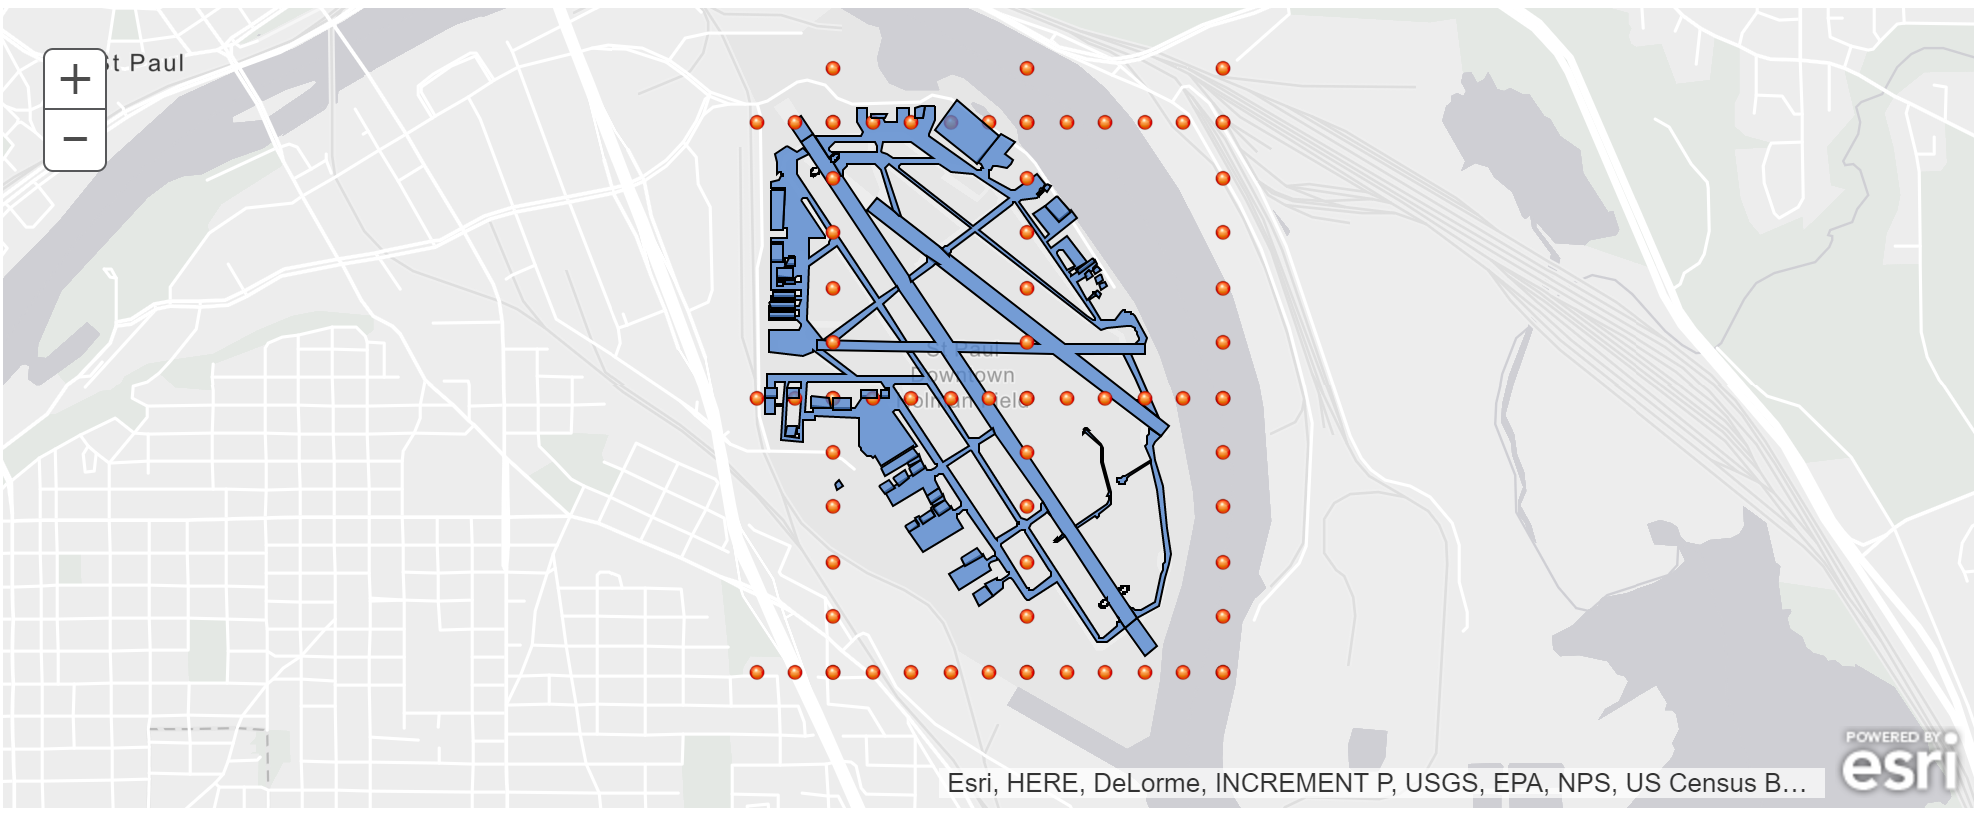

In [15]:
from IPython.core.display import Image 
Image('C:/Users/Q Ray Lin/Desktop/Capture.png')